In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [7]:
train = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=ToTensor()
)
test = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=ToTensor()
)
train_loader = DataLoader(train, batch_size=128, shuffle=True)
test_loader = DataLoader(test, batch_size=256, shuffle=False)


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'
weights = ResNet18_Weights.DEFAULT


In [15]:
base_model = resnet18(weights=weights).to(device)
base_model.fc = nn.Linear(512, 10, bias=True).to(device)

In [5]:
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * labels.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    return total_loss / total, correct / total

@torch.no_grad()
def evaluate(model, dataloader, device):
    model.eval()
    correct, total = 0, 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    return correct / total


In [ ]:
optimizer = torch.optim.Adam(base_model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
    train_loss, train_acc = train_one_epoch(base_model, train_loader, optimizer, criterion, device)

    test_acc = evaluate(base_model, test_loader, device)

    print(f"Epoch {epoch}: "
          f"loss={train_loss:.4f}, "
          f"train_acc={train_acc:.4f}, "
          f"test_acc={test_acc:.4f}")

Epoch 0: loss=1.0444, train_acc=0.6391, test_acc=0.7473
Epoch 1: loss=0.5626, train_acc=0.8071, test_acc=0.7818
Epoch 2: loss=0.3698, train_acc=0.8728, test_acc=0.7892
Epoch 3: loss=0.2361, train_acc=0.9189, test_acc=0.7995


In [3]:
state_dict = model.state_dict()
for name, param in state_dict.items():
    print(name, param.shape)

conv1.weight torch.Size([64, 3, 7, 7])
bn1.weight torch.Size([64])
bn1.bias torch.Size([64])
bn1.running_mean torch.Size([64])
bn1.running_var torch.Size([64])
bn1.num_batches_tracked torch.Size([])
layer1.0.conv1.weight torch.Size([64, 64, 3, 3])
layer1.0.bn1.weight torch.Size([64])
layer1.0.bn1.bias torch.Size([64])
layer1.0.bn1.running_mean torch.Size([64])
layer1.0.bn1.running_var torch.Size([64])
layer1.0.bn1.num_batches_tracked torch.Size([])
layer1.0.conv2.weight torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight torch.Size([64])
layer1.0.bn2.bias torch.Size([64])
layer1.0.bn2.running_mean torch.Size([64])
layer1.0.bn2.running_var torch.Size([64])
layer1.0.bn2.num_batches_tracked torch.Size([])
layer1.1.conv1.weight torch.Size([64, 64, 3, 3])
layer1.1.bn1.weight torch.Size([64])
layer1.1.bn1.bias torch.Size([64])
layer1.1.bn1.running_mean torch.Size([64])
layer1.1.bn1.running_var torch.Size([64])
layer1.1.bn1.num_batches_tracked torch.Size([])
layer1.1.conv2.weight torch.Size([64, 6

In [4]:
model.layer2[0].conv1.weight

Parameter containing:
tensor([[[[-7.1555e-02, -1.1031e-01, -1.3711e-01],
          [ 7.0593e-02, -1.4782e-02, -1.0053e-01],
          [ 1.1938e-01,  8.7330e-02, -8.2206e-03]],

         [[-2.3999e-02, -6.3682e-03,  2.4303e-03],
          [ 6.1831e-03,  1.8781e-02,  2.5324e-02],
          [ 2.3656e-03, -4.0037e-03, -1.1949e-02]],

         [[ 6.0344e-03,  6.3784e-03, -1.2247e-02],
          [ 7.8854e-03, -1.3464e-02, -4.2702e-02],
          [ 1.7380e-02, -1.3862e-02, -4.7145e-02]],

         ...,

         [[ 3.4324e-02,  3.2257e-02,  2.5819e-02],
          [ 8.4676e-03, -4.5413e-04, -1.0832e-02],
          [-6.7166e-03, -1.5052e-02, -2.6939e-02]],

         [[-1.2089e-02, -2.3588e-02, -2.2689e-02],
          [ 1.0135e-02,  1.8285e-02, -1.5695e-02],
          [ 2.1352e-02,  5.8568e-02,  4.2873e-02]],

         [[ 1.4421e-02, -2.8298e-02, -7.0770e-03],
          [ 3.0260e-02, -6.6294e-03, -1.6901e-02],
          [ 3.9085e-02,  1.4222e-02,  2.2294e-02]]],


        [[[-7.7911e-02, -7.3929

In [5]:
model.fc.weight

Parameter containing:
tensor([[-0.0185, -0.0705, -0.0518,  ..., -0.0390,  0.1735, -0.0410],
        [-0.0818, -0.0944,  0.0174,  ...,  0.2028, -0.0248,  0.0372],
        [-0.0332, -0.0566, -0.0242,  ..., -0.0344, -0.0227,  0.0197],
        ...,
        [-0.0103,  0.0033, -0.0359,  ..., -0.0279, -0.0115,  0.0128],
        [-0.0359, -0.0353, -0.0296,  ..., -0.0330, -0.0110, -0.0513],
        [ 0.0021, -0.0248, -0.0829,  ...,  0.0417, -0.0500,  0.0663]],
       requires_grad=True)

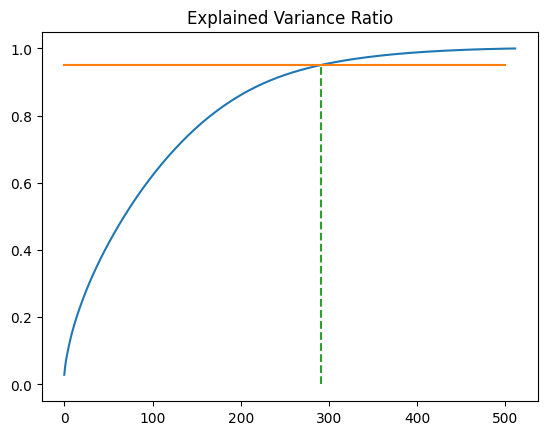

In [7]:
last_layer_w = model.fc.weight.detach()
last_layer_b = model.fc.bias.detach()

U, S, Vt = torch.linalg.svd(last_layer_w, full_matrices=False)

variance = S**2
variance_ratio = variance / variance.sum()
explained_var = torch.cumsum(variance_ratio, dim=0)
ind = torch.searchsorted(explained_var, 0.95) + 1

plt.plot(explained_var)
plt.plot([0, 500], [0.95, 0.95])
plt.plot([ind, ind], [0, 0.95], linestyle='dashed')
plt.title('Explained Variance Ratio')
plt.show()


In [ ]:
U_k, S_k, Vt_k = U[:, :ind], S[:ind], Vt[:ind, :]

fc1 = nn.Linear(512, ind, bias=False)
fc2 = nn.Linear(ind, 1000, bias=True)

fc1.weight.data = Vt_k
fc2.weight.data = U_k @ torch.diag(S_k)
fc2.bias.data = last_layer_b

nn.Sequential(fc1, fc2)

In [11]:
def linear_layer_compressor(layer, EVR_frac):
    w = layer.weight.detach().cpu()
    w2d = w.reshape(w.shape[0], -1)
    
    U, S, Vt = torch.linalg.svd(w2d, full_matrices=False)
    
    variance = S ** 2
    variance_ratio = variance / variance.sum()
    explained_var = torch.cumsum(variance_ratio, dim=0)
    dim = torch.searchsorted(explained_var, EVR_frac) + 1

    U_r = U[:, :dim]
    S_r = S[:dim]
    Vt_r = Vt[:dim, :]

    l1 = nn.Linear(w.shape[1], dim, bias=False)

    try:
        b = layer.bias

    except:
        l2 = nn.Linear(dim, w.shape[0], bias=False)

    else:
        l2 = nn.Linear(dim, w.shape[0], bias=True)
        l2.bias.data = b

    l1.weight.data = Vt_r
    l2.weight.data = U_r @ torch.diag(S_r)

    return nn.Sequential(l1, l2)


def conv_layer_compressor(layer, EVR_frac):
    w = layer.weight.detach().cpu()
    w2d = w.reshape(w.shape[0], -1)
    
    U, S, Vt = torch.linalg.svd(w2d, full_matrices=False)
    
    variance = S ** 2
    variance_ratio = variance / variance.sum()
    explained_var = torch.cumsum(variance_ratio, dim=0)
    dim = torch.searchsorted(explained_var, EVR_frac) + 1

    U_r = U[:, :dim]
    S_r = S[:dim]
    Vt_r = Vt[:dim, :]

    c1 = nn.Conv2d(
        in_channels=w.shape[1],
        out_channels=dim,
        kernel_size=(w.shape[2], w.shape[3]),
        stride=layer.stride,
        padding=layer.padding,
        dilation=layer.dilation,
        groups=layer.groups,
        bias=False
    )

    b = layer.bias

    if b == None:
        c2 = nn.Conv2d(
            in_channels=dim,
            out_channels=w.shape[0],
            kernel_size=1,
            bias=False
        )

    else:
        c2 = nn.Conv2d(
            in_channels=dim, 
            out_channels=w.shape[0],
            kernel_size=1,
            bias=True
        )

        c2.bias.data = b

    c1.weight.data = Vt_r.reshape(dim, w.shape[1], w.shape[2], w.shape[3])
    c2.weight.data = (U_r @ torch.diag(S_r)).reshape(w.shape[0], dim, 1, 1)

    return nn.Sequential(c1, c2)


In [63]:
model_org = resnet18(weights=weights)

model_50 = resnet18(weights=weights)
model_80 = resnet18(weights=weights)

In [64]:
model_50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
def compressor(model, thresh):
    for name, module in model.named_children():
        if isinstance(module, nn.Sequential) or isinstance(module, torchvision.models.resnet.BasicBlock):
            compressor(module, thresh)
        elif isinstance(module, nn.Linear):
            compressd_module = linear_layer_compressor(module, thresh)
            setattr(model, name, compressd_module)
        
        elif isinstance(module, nn.Conv2d):
            compressd_module = conv_layer_compressor(module, thresh)
            setattr(model, name, compressd_module)

In [65]:
compressor(model_50, 0.50)

In [66]:
model_50

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 7, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): Conv2d(7, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): Conv2d(8, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Sequential(
        (0): Conv2d(64, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): Conv2d(12, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (bn2): BatchNorm2d(64, eps=